In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd
import re

In [16]:
edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")
edges.rename(columns={'# source': 'source',' target':'target',' layer':'layer'}, inplace=True)
nodes.rename(columns={' _pos':'pos', '# index':'index'},inplace = True)
layer_mapping = {1: 'Tube', 2: 'Overground', 3: 'DLR'}
edges["layer"] = edges["layer"].replace(layer_mapping)

In [18]:
G = nx.Graph()

for index, row in edges.iterrows():
    G.add_edge(row['source'], row['target'], layer=row['layer'])

for index, row in nodes.iterrows():
    x, y = map(float, re.findall(r'\d+\.\d+',row['pos']))
    nx.set_node_attributes(G, {row["index"]: (x, -y)}, 'pos') # minus, ponieważ os oy jest odwrócona, nie wiem dlaczego


In [19]:
layer_colors = {'Tube': 'red', 'Overground': 'green', 'DLR': 'blue'}
edge_colors = [layer_colors[G[u][v]['layer']] for u, v in G.edges()]
pos = nx.get_node_attributes(G,'pos')

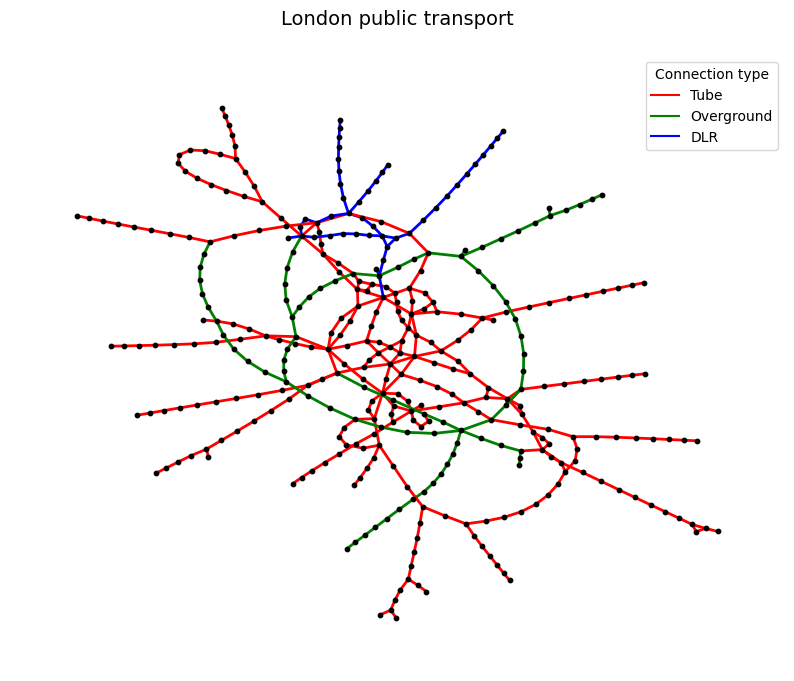

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))
nx.draw(G, pos, edge_color=edge_colors, node_size=10,width = 2, node_color='black')
for layer, color in layer_colors.items():
    plt.plot([], [], color=color, label=layer)
plt.legend(title='Connection type', loc='upper right')
plt.text(0.5, 1.05, 'London public transport', transform=ax.transAxes, fontsize=14, ha='center')
plt.savefig('london_transport.png')
plt.show()